In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline  

In [2]:
df = pd.read_csv("diabetic_data.csv")

In [3]:
# Generate the profile report
profile = ProfileReport(
    df, title="Diabetes Dataset Profiling Report", explorative=True)
profile.to_file("diabetes_profiling_report.html")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '>7'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Checking for '?' or missing values
missing_val = df.applymap(lambda x: x == "?" or pd.isnull(x))
# Number of invalid entries per column
num_invalid_entries_per_column = missing_val.sum()
print(num_invalid_entries_per_column)

/var/folders/hw/f3nw6z557cn46r_ps0v6ch040000gn/T/ipykernel_12309/145927527.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_val = df.applymap(lambda x: x == "?" or pd.isnull(x))


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
# Replace 'None' with 'NotTested' for max_glu_serum and A1Cresult
df["max_glu_serum"] = df["max_glu_serum"].replace(np.nan, "Not Tested")
df["A1Cresult"] = df["A1Cresult"].replace(np.nan, "NotTested")

In [6]:
df["max_glu_serum"].unique()
df["A1Cresult"].unique()

array(['NotTested', '>7', '>8', 'Norm'], dtype=object)

In [7]:
# Calculating the percentage of missing and invalid data in each column after replacing 'None' with 'NotTested'
missing_val = df.applymap(lambda x: x == "?" or pd.isnull(x))
missing_invalid_data = missing_val.sum() / len(df) * 100
print(missing_invalid_data)

/var/folders/hw/f3nw6z557cn46r_ps0v6ch040000gn/T/ipykernel_12309/1936062498.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_val = df.applymap(lambda x: x == "?" or pd.isnull(x))


encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [8]:
# Replacing '?' with Unknown for the columns with missing values
df = df.replace("?", "Unknown")

In [9]:
# Dropping columns with more than 35% missing data
df = df.drop(["weight", "payer_code", "medical_specialty"], axis=1)

In [10]:
# dropping patient_nbr column
df = df.drop(["patient_nbr"], axis=1)

In [11]:
print(df["gender"].unique())

['Female' 'Male' 'Unknown/Invalid']


In [12]:
# Dropping gender entries with 'Unknown/Invalid'
df = df[df["gender"] != "Unknown/Invalid"]

In [13]:
# Categorizing diag_1, diag_2, diag_3 into 9 categories based on ICD-9 codes


def categorize_diag(value):
    try:
        if value == "NA":
            return np.nan
        if value == "250.xx" or value.startswith("250"):
            return "Diabetes"
        val = int(value)
        if 390 <= val <= 459 or val == 785:
            return "Circulatory"
        if 460 <= val <= 519 or val == 786:
            return "Respiratory"
        if 520 <= val <= 579 or val == 787:
            return "Digestive"
        if 800 <= val <= 999:
            return "Injury"
        if 710 <= val <= 739:
            return "Musculoskeletal"
        if 580 <= val <= 629 or val == 788:
            return "Genitourinary"
        if 140 <= val <= 239:
            return "Neoplasms"
        if (
            val in [780, 781, 784, 782]
            or 790 <= val <= 799
            or 240 <= val <= 249
            or 251 <= val <= 279
            or 680 <= val <= 709
            or 1 <= val <= 139
            or 290 <= val <= 319
        ):
            return "Other"
    except ValueError:
        if value.startswith("E") or value.startswith("V"):
            return "Other"
    return "Other"


df["diag_1"] = df["diag_1"].apply(categorize_diag)
df["diag_2"] = df["diag_2"].apply(categorize_diag)
df["diag_3"] = df["diag_3"].apply(categorize_diag)

In [14]:
df["diag_1"].unique()
df["diag_2"].unique()
df["diag_3"].unique()

array(['Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Neoplasms', 'Genitourinary', 'Musculoskeletal', 'Digestive'],
      dtype=object)

In [15]:
numeric = df[
    [
        "time_in_hospital",
        "num_procedures",
        "num_lab_procedures",
        "num_medications",
        "number_outpatient",
        "number_emergency",
        "number_inpatient",
        "number_diagnoses",
    ]
]
categorical = df[
    [
        "race",
        "gender",
        "admission_type_id",
        "discharge_disposition_id",
        "admission_source_id",
        "diag_1",
        "diag_2",
        "diag_3",
        "change",
        "diabetesMed",
        "readmitted",
    ]
]

##### Histograms for numerical variables


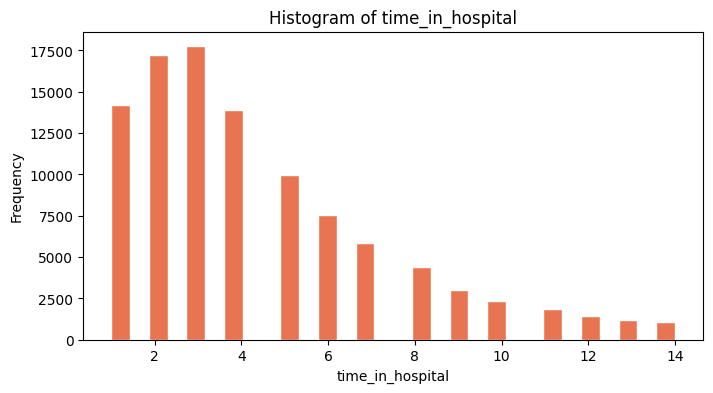

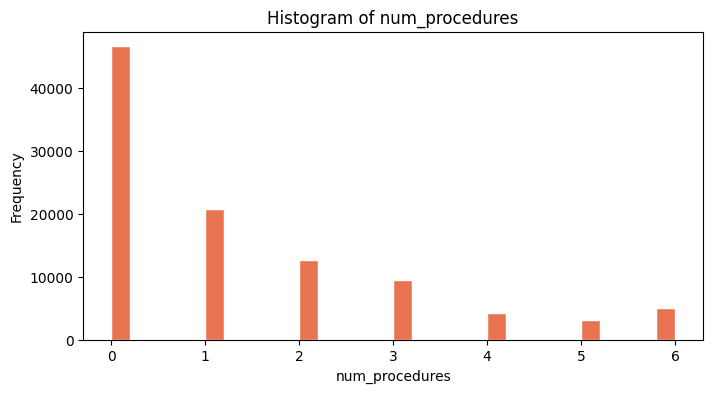

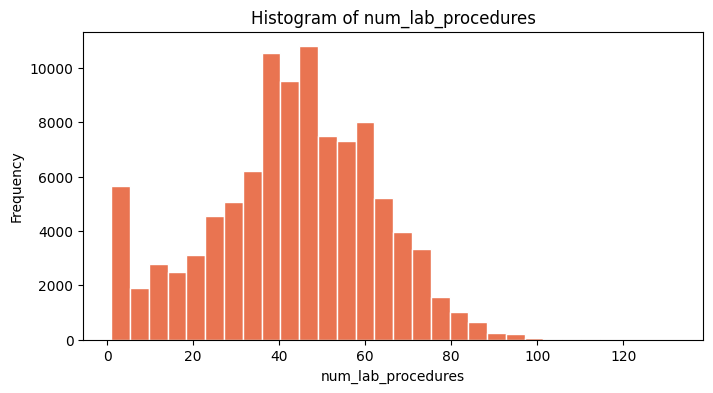

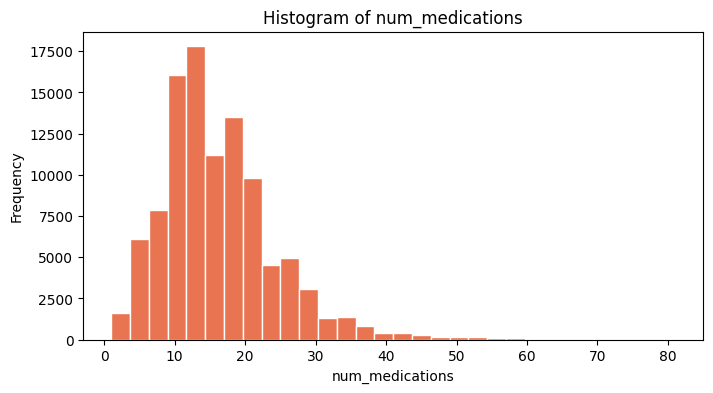

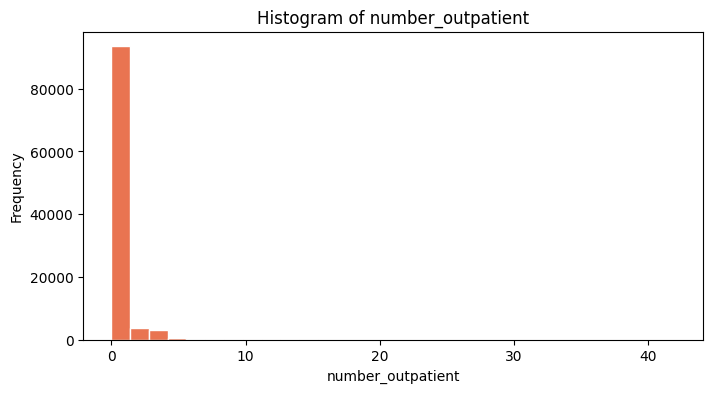

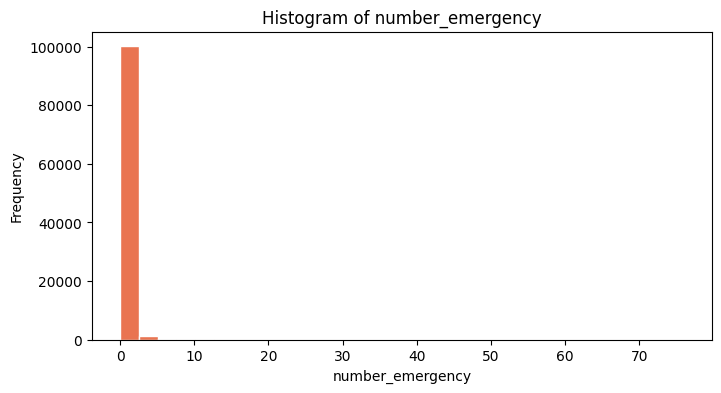

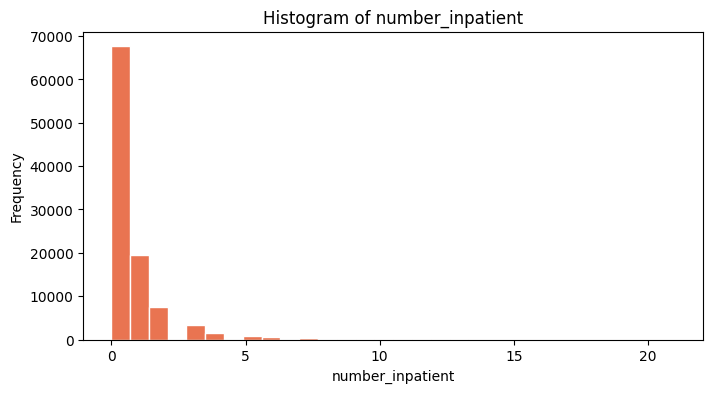

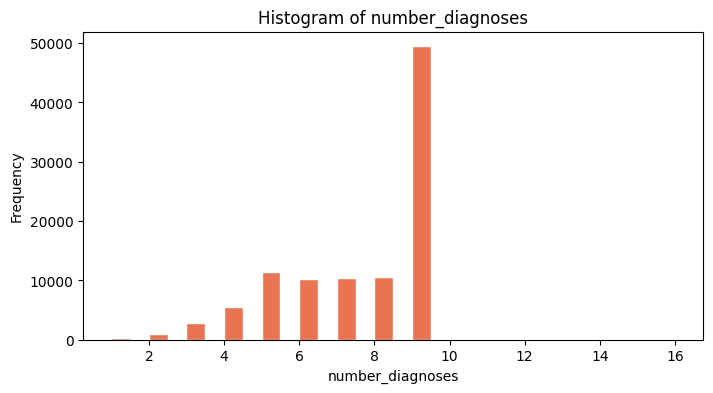

In [16]:
# Generate histograms
for var in numeric:
    plt.figure(figsize=(8, 4))
    plt.hist(df[var], bins=30, edgecolor="white", color="#E97451")
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

##### Bar plot for categorical variables


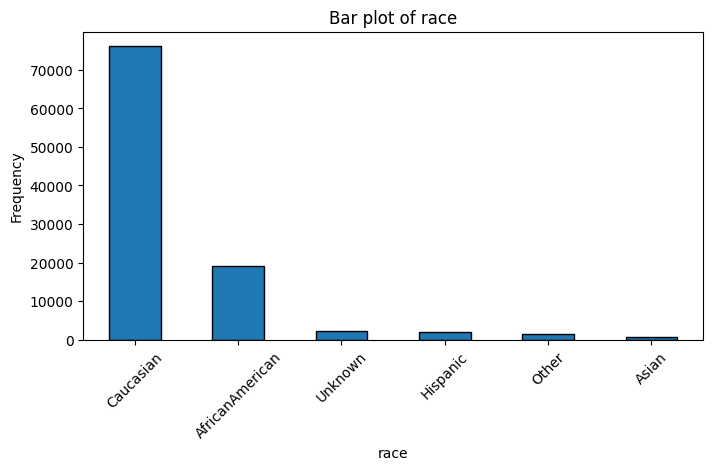

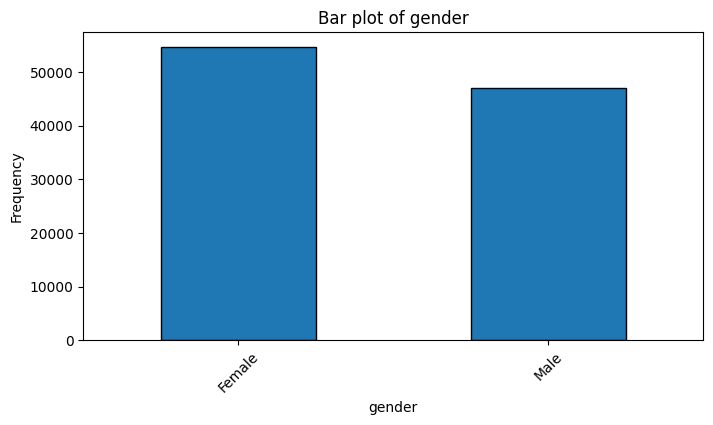

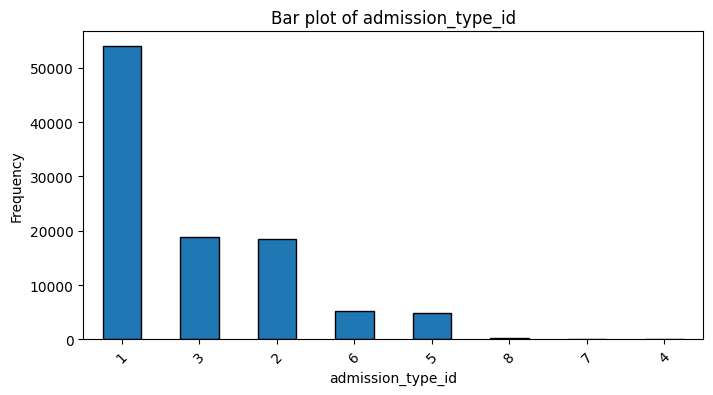

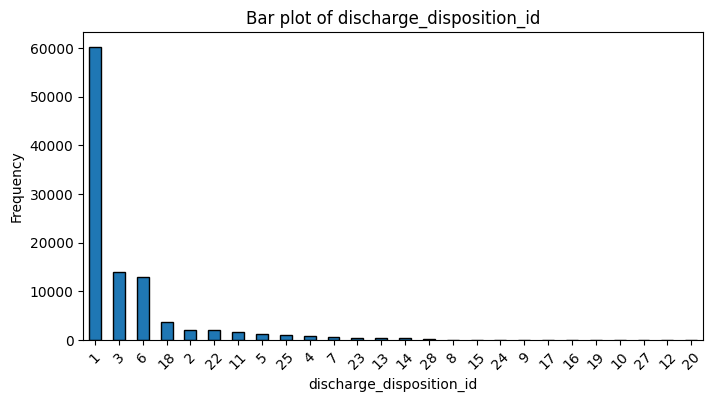

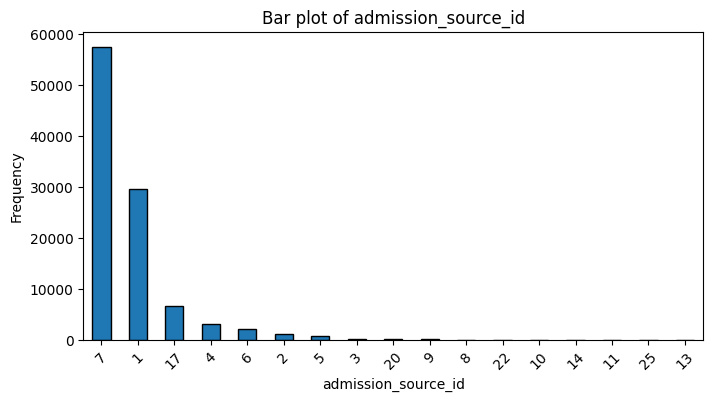

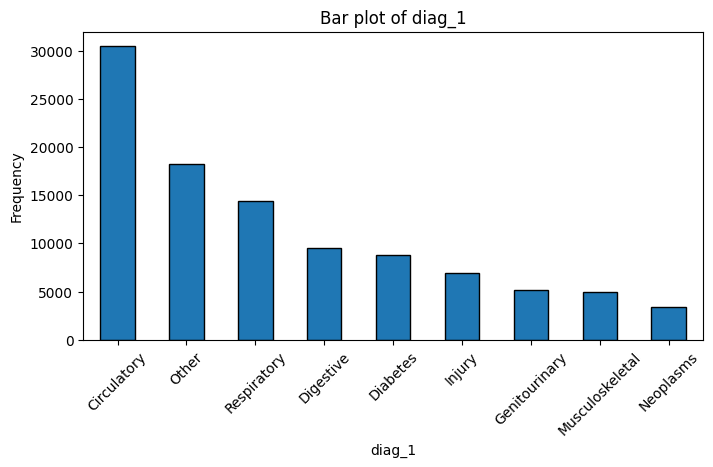

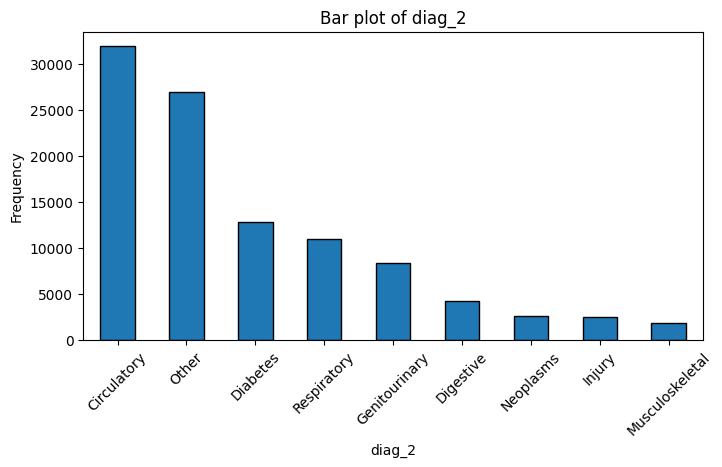

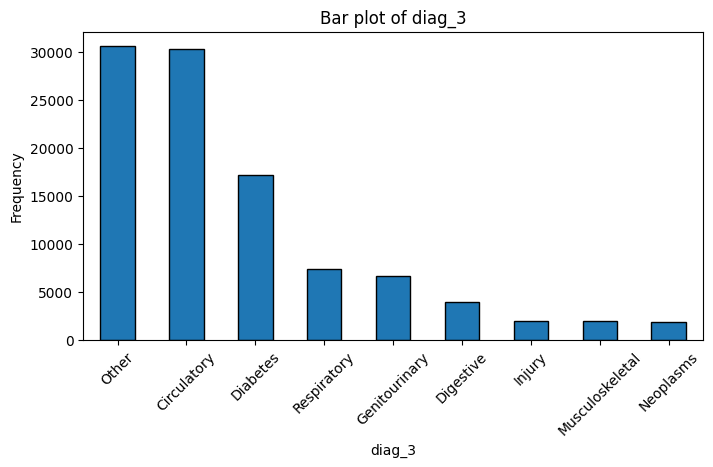

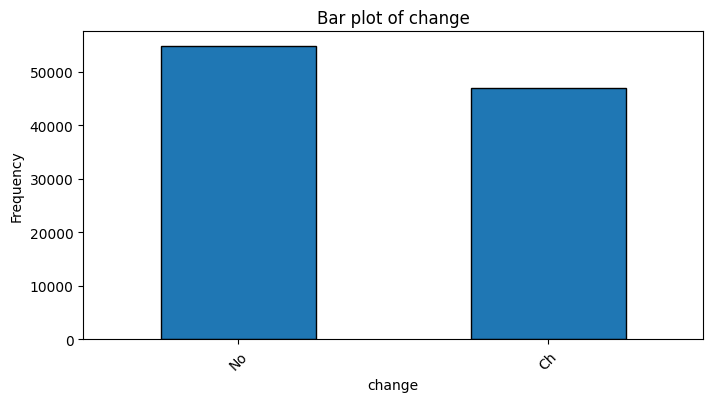

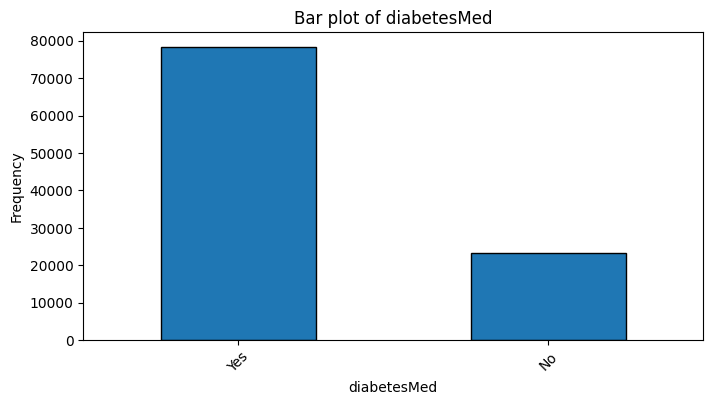

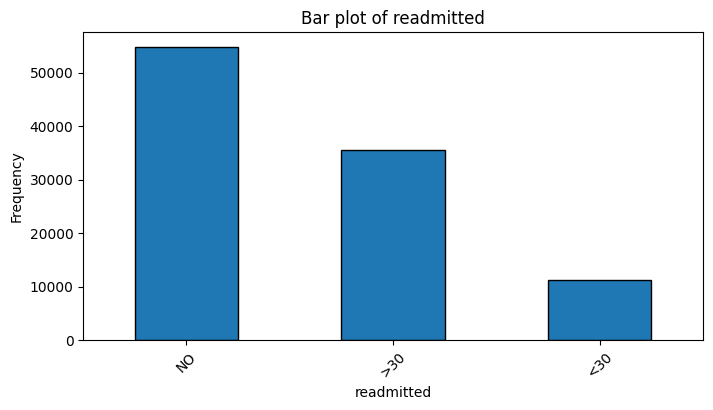

In [17]:
for var in categorical:
    plt.figure(figsize=(8, 4))
    df[var].value_counts().plot(kind="bar", edgecolor="black")
    plt.title(f"Bar plot of {var}")
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

##### Scatter plots for continuous variables


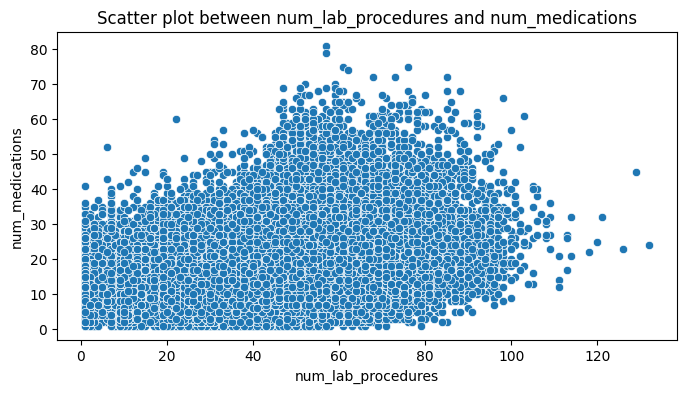

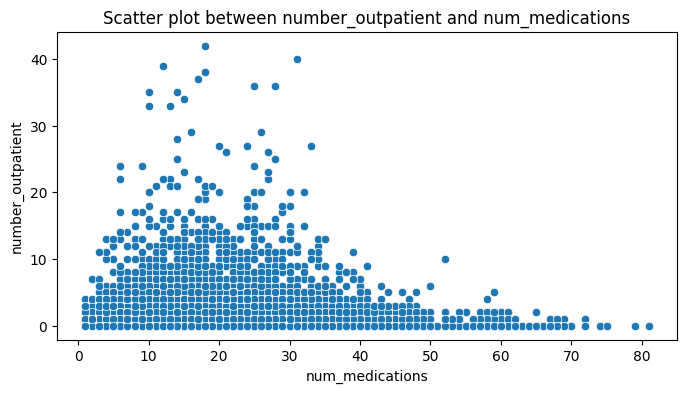

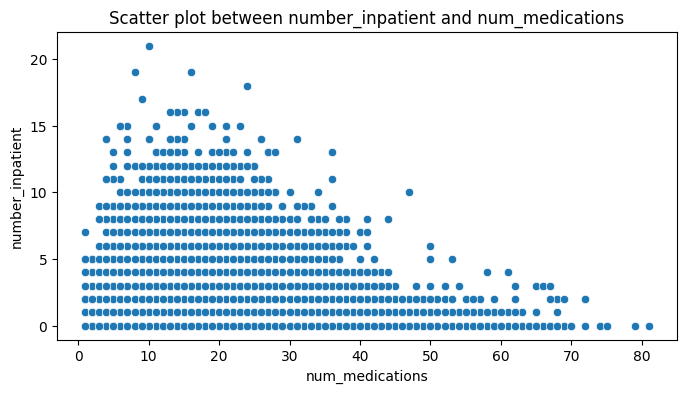

In [18]:
# Scatter plot for specific pairs of variables
plt.figure(figsize=(8, 4))
sns.scatterplot(x="num_lab_procedures", y="num_medications", data=df)
plt.title("Scatter plot between num_lab_procedures and num_medications")
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x="num_medications", y="number_outpatient", data=df)
plt.title("Scatter plot between number_outpatient and num_medications")
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x="num_medications", y="number_inpatient", data=df)
plt.title("Scatter plot between number_inpatient and num_medications")
plt.show()

##### MultiVariable Analysis


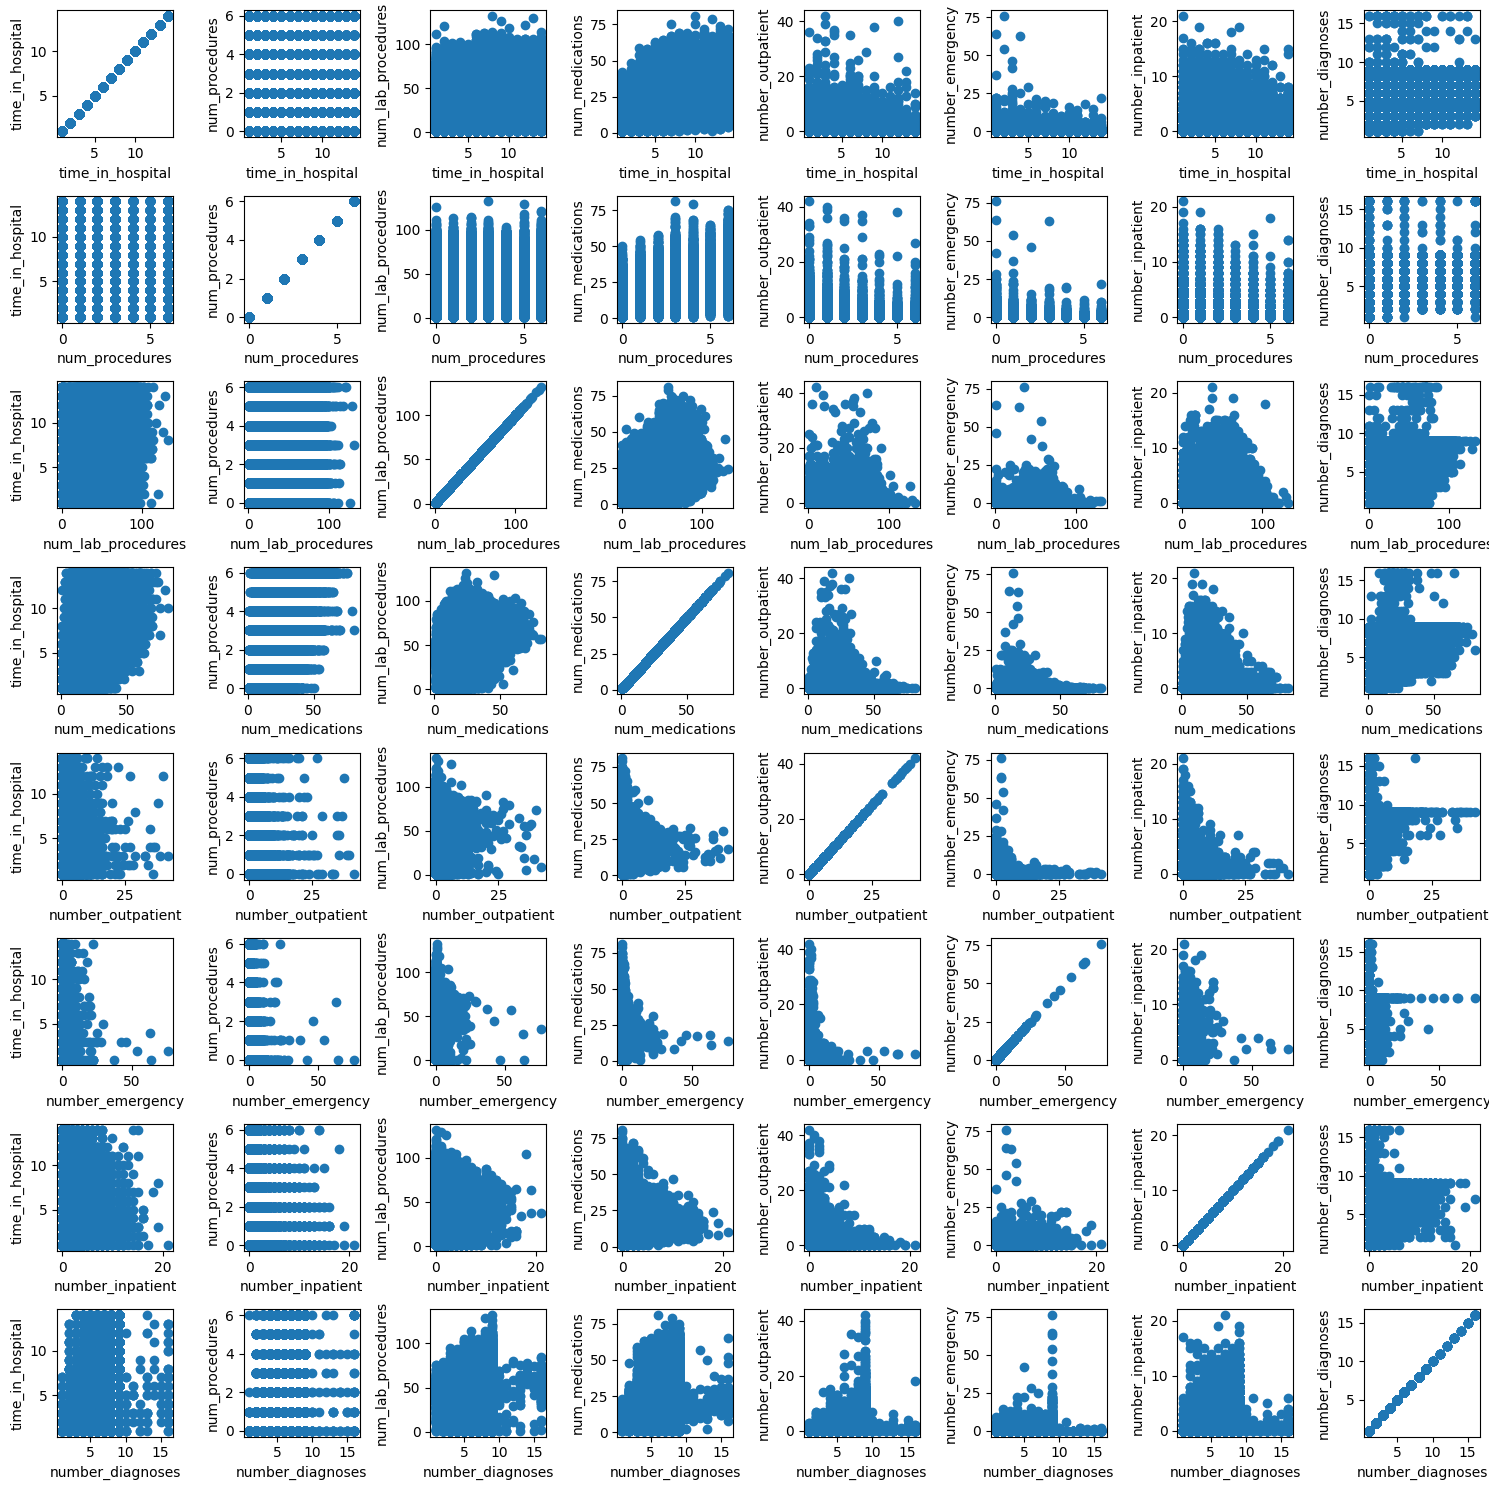

In [19]:
fig, axs = plt.subplots(len(numeric.columns), len(
    numeric.columns), figsize=(15, 15))

for i in range(len(numeric.columns)):
    for j in range(len(numeric.columns)):
        axs[i, j].scatter(numeric[numeric.columns[i]],
                          numeric[numeric.columns[j]])
        axs[i, j].set(xlabel=numeric.columns[i], ylabel=numeric.columns[j])

plt.tight_layout()
plt.show()

##### Correlation matrix


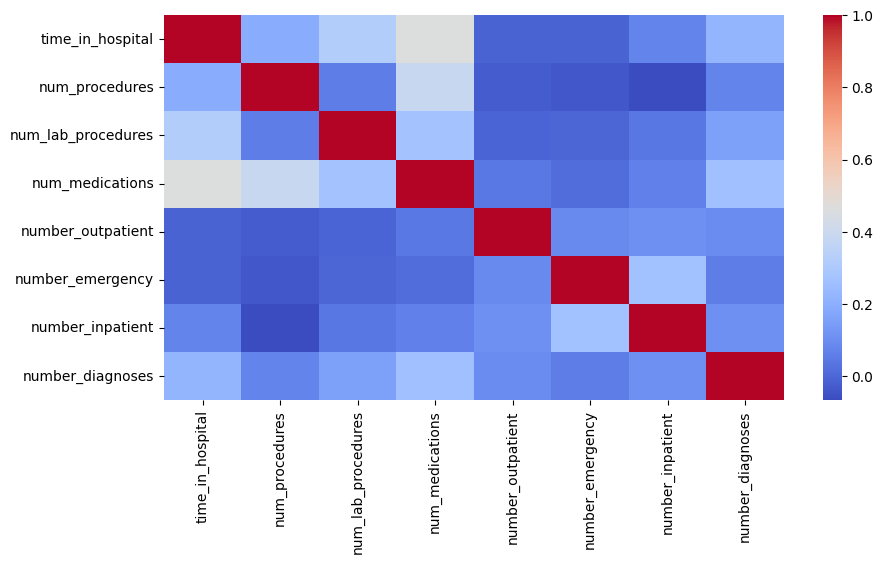

In [20]:
# Compute the correlation matrix
corr_matrix = numeric.corr()
# print the correlation matrix
# print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

In [21]:
# Dropping columns which are not required for the analysis
df = df.drop(
    columns=[
        "metformin",
        "repaglinide",
        "nateglinide",
        "chlorpropamide",
        "glimepiride",
        "acetohexamide",
        "glipizide",
        "glyburide",
        "tolbutamide",
        "pioglitazone",
        "rosiglitazone",
        "acarbose",
        "miglitol",
        "troglitazone",
        "tolazamide",
        "examide",
        "citoglipton",
        "glyburide-metformin",
        "glipizide-metformin",
        "glimepiride-pioglitazone",
        "metformin-rosiglitazone",
        "metformin-pioglitazone",
    ],
    axis=1,
)

In [22]:
# Modifying the readmitted column to binary
df["readmitted"] = df["readmitted"].replace(">30", 0)
df["readmitted"] = df["readmitted"].replace("<30", 1)
df["readmitted"] = df["readmitted"].replace("NO", 1)

/var/folders/hw/f3nw6z557cn46r_ps0v6ch040000gn/T/ipykernel_12309/3876932572.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["readmitted"] = df["readmitted"].replace("NO", 1)


In [23]:
# remove readmitted from categorical
categorical = categorical.drop(columns=["readmitted"], axis=1)

In [24]:
categorical

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,change,diabetesMed
0,Caucasian,Female,6,25,1,Diabetes,Other,Other,No,No
1,Caucasian,Female,1,1,7,Other,Diabetes,Other,Ch,Yes
2,AfricanAmerican,Female,1,1,7,Other,Diabetes,Other,No,Yes
3,Caucasian,Male,1,1,7,Other,Diabetes,Circulatory,Ch,Yes
4,Caucasian,Male,1,1,7,Neoplasms,Neoplasms,Diabetes,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,7,Diabetes,Other,Circulatory,Ch,Yes
101762,AfricanAmerican,Female,1,4,5,Digestive,Other,Digestive,No,Yes
101763,Caucasian,Male,1,1,7,Other,Genitourinary,Other,Ch,Yes
101764,Caucasian,Female,2,3,7,Injury,Other,Injury,Ch,Yes


In [25]:
# categorising the diagnosis columns into 2 categories - Diabetes and Other for the purpose of Diabetic analysis


def categorize_diag_2(value):
    try:
        if value == "Diabetes":
            return "Diabetes"
        else:
            return "Other"
    except ValueError:
        return "Other"


df["diag_1"] = df["diag_1"].apply(categorize_diag_2)
df["diag_2"] = df["diag_2"].apply(categorize_diag_2)
df["diag_3"] = df["diag_3"].apply(categorize_diag_2)

In [26]:
print(df["diag_1"].unique())
print(df["diag_2"].unique())
print(df["diag_3"].unique())

['Diabetes' 'Other']
['Other' 'Diabetes']
['Other' 'Diabetes']


In [27]:
# Updating the categorical columns after categorizing the diagnosis columns
categorical["diag_1"] = df["diag_1"]
categorical["diag_2"] = df["diag_2"]
categorical["diag_3"] = df["diag_3"]
categorical

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,change,diabetesMed
0,Caucasian,Female,6,25,1,Diabetes,Other,Other,No,No
1,Caucasian,Female,1,1,7,Other,Diabetes,Other,Ch,Yes
2,AfricanAmerican,Female,1,1,7,Other,Diabetes,Other,No,Yes
3,Caucasian,Male,1,1,7,Other,Diabetes,Other,Ch,Yes
4,Caucasian,Male,1,1,7,Other,Other,Diabetes,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,7,Diabetes,Other,Other,Ch,Yes
101762,AfricanAmerican,Female,1,4,5,Other,Other,Other,No,Yes
101763,Caucasian,Male,1,1,7,Other,Other,Other,Ch,Yes
101764,Caucasian,Female,2,3,7,Other,Other,Other,Ch,Yes


In [28]:
# modifying the age column to have the mid value of the age range for better analysis
age_id = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95,
}
df["age"] = df.age.replace(age_id)

/var/folders/hw/f3nw6z557cn46r_ps0v6ch040000gn/T/ipykernel_12309/3402272236.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["age"] = df.age.replace(age_id)


In [29]:
# One hot encoding the categorical columns
categorical = pd.get_dummies(categorical)

In [30]:
categorical

,admission_type_id,discharge_disposition_id,admission_source_id,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Female,...,diag_1_Diabetes,diag_1_Other,diag_2_Diabetes,diag_2_Other,diag_3_Diabetes,diag_3_Other,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,False,False,True,False,False,False,True,...,True,False,False,True,False,True,False,True,True,False
1,1,1,7,False,False,True,False,False,False,True,...,False,True,True,False,False,True,True,False,False,True
2,1,1,7,True,False,False,False,False,False,True,...,False,True,True,False,False,True,False,True,False,True
3,1,1,7,False,False,True,False,False,False,False,...,False,True,True,False,False,True,True,False,False,True
4,1,1,7,False,False,True,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,True,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True
101762,1,4,5,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,True,False,True
101763,1,1,7,False,False,True,False,False,False,False,...,False,True,False,True,False,True,True,False,False,True
101764,2,3,7,False,False,True,False,False,False,True,...,False,True,False,True,False,True,True,False,False,True


In [31]:
categorical = categorical.astype("int64")

In [32]:
categorical

,admission_type_id,discharge_disposition_id,admission_source_id,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_Female,...,diag_1_Diabetes,diag_1_Other,diag_2_Diabetes,diag_2_Other,diag_3_Diabetes,diag_3_Other,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,0,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
1,1,1,7,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
2,1,1,7,1,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,1
3,1,1,7,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
4,1,1,7,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,1,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
101762,1,4,5,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
101763,1,1,7,0,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
101764,2,3,7,0,0,1,0,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [33]:
dff = pd.concat(
    [df[["encounter_id", "age", "readmitted"]], categorical, numeric], axis=1
)

In [34]:
dff.columns

Index(['encounter_id', 'age', 'readmitted', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_Unknown', 'gender_Female', 'gender_Male',
       'diag_1_Diabetes', 'diag_1_Other', 'diag_2_Diabetes', 'diag_2_Other',
       'diag_3_Diabetes', 'diag_3_Other', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'time_in_hospital',
       'num_procedures', 'num_lab_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [35]:
dff.head()

,encounter_id,age,readmitted,admission_type_id,discharge_disposition_id,admission_source_id,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,...,diabetesMed_No,diabetesMed_Yes,time_in_hospital,num_procedures,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,5,1,6,25,1,0,0,1,0,...,1,0,1,0,41,1,0,0,0,1
1,149190,15,0,1,1,7,0,0,1,0,...,0,1,3,0,59,18,0,0,0,9
2,64410,25,1,1,1,7,1,0,0,0,...,0,1,2,5,11,13,2,0,1,6
3,500364,35,1,1,1,7,0,0,1,0,...,0,1,2,1,44,16,0,0,0,7
4,16680,45,1,1,1,7,0,0,1,0,...,0,1,1,0,51,8,0,0,0,5


In [36]:
# Dropping the columns with 'Other' category in the diagnosis columns as we are only interested in Diabetes
dff = dff.drop(columns=["diag_1_Other", "diag_2_Other", "diag_3_Other"], axis=1)

In [37]:
# importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [38]:
# Feature extraction
X = dff.drop("readmitted", axis=1)
y = dff["readmitted"]


# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(81410, 28) (20353, 28) (81410,) (20353,)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate


def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


scores = {"accuracy": make_scorer(accuracy_score), "prec": "precision"}
scores = {
    "tp": make_scorer(tp),
    "tn": make_scorer(tn),
    "fp": make_scorer(fp),
    "fn": make_scorer(fn),
}


def display_result(result):
    print("TP: ", result["test_tp"])
    print("TN: ", result["test_tn"])
    print("FN: ", result["test_fn"])
    print("FP: ", result["test_fp"])

##### Logistic Regression


In [40]:
acc = []
roc = []

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# finding accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)

# finding the ROC_AOC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# cross val score
result = cross_validate(clf, X_train, y_train, scoring=scores, cv=10)
display_result(result)
pd.DataFrame(data={"Actual": y_test, "Predicted": y_pred}).head()


Accuracy 0.6527293273718862 ROC 0.5
TP:  [5294 5294 5294 5293 5293 5293 5293 5293 5293 5293]
TN:  [0 0 0 0 0 0 0 0 0 0]
FN:  [0 0 0 0 0 0 0 0 0 0]
FP:  [2847 2847 2847 2848 2848 2848 2848 2848 2848 2848]


,Actual,Predicted
35957,1,1
60928,1,1
79920,1,1
50079,1,1
44081,1,1


##### Random Forest


In [41]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)

# find the ROC_AOC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# cross val score
result = cross_validate(clf, X_train, y_train, scoring=scores, cv=10)
display_result(result)
pd.DataFrame(data={"Actual": y_test, "Predicted": y_pred}).head()


Accuracy 0.6623102245369233 ROC 0.5731517199764256
TP:  [4612 4516 4634 4557 4577 4576 4575 4624 4597 4564]
TN:  [840 740 786 760 760 772 741 858 876 820]
FN:  [682 778 660 736 716 717 718 669 696 729]
FP:  [2007 2107 2061 2088 2088 2076 2107 1990 1972 2028]


,Actual,Predicted
35957,1,0
60928,1,1
79920,1,1
50079,1,1
44081,1,1
